In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [57]:
file = np.loadtxt(open("X2.csv"), delimiter=",")
X = file
file = np.loadtxt(open("y2.csv"), delimiter=",")
y = file

#Train model
XTrain = X[0:3500,:]
yTrain = y[0:3500]

#Test model
XTest = X[3500:4120,:]
yTest= y[3500:4120]

In [58]:
model = LogisticRegression(solver='liblinear')
model.fit(XTrain, yTrain)
    

LogisticRegression(solver='liblinear')

In [59]:
#ns_probs = [0 for _ in range(len(yTest))]
#ns_auc = roc_auc_score(yTest, ns_probs)
pTrain = model.predict_proba(XTrain)
pTrain = pTrain[:,1] #Because the above gives two columns, probability of 0 and probability of 1, we only want the later

pTest = model.predict_proba(XTest)
pTest = pTest[:,1]

#AUC values [Cuando sale .5 es que todas tus predicciones estan mal, lo puedes simular metiendo puros ceros a pTrain o pTest]
AUCTrain = roc_auc_score(yTrain, pTrain)    
AUCTest = roc_auc_score(yTest, pTest)
print("Area Under Curve Logistic Train = ",AUCTrain) 
print("Area Under Curve Logistic Test = ",AUCTest)


Area Under Curve Logistic Train =  0.6431402356446371
Area Under Curve Logistic Test =  0.6732236262745223


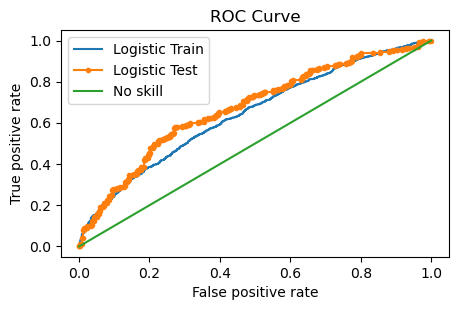

In [60]:
# Calculate ROC Curves [False positives agains True positives]
FPTrain, TPTrain, _ = roc_curve(yTrain, pTrain)
    
FPTest, TPTest, _ = roc_curve(yTest, pTest)

plot0 = plt.figure(0,figsize=(5,3), dpi=100)
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(FPTrain, TPTrain, label='Logistic Train')
plt.plot(FPTest, TPTest, marker='.', label='Logistic Test')
plt.plot([0,1],[0,1],label='No skill')
plt.legend() #Show legend
